### Data Science Salaries 2023
#### Data Info
1. Data is collected from Kaggle
2. Dataset contains 11 columns
 * work_year: The year the salary was paid.
 * experience_level: The experience level in the job during the year
 * employment_type: The type of employment for the role
 * job_title: The role worked in during the year.
 * salary: The total gross salary amount paid.
 * salary_currency: The currency of the salary paid as an ISO 4217 currency code.
 * salaryinusd: The salary in USD
 * employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
 * remote_ratio: The overall amount of work done remotely
 * company_location: The country of the employer's main office or contracting branch
 * company_size: The median number of people that worked for the company during the year

In [2]:
#load necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
data = pd.read_csv('ds_salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
#create a function data preprocessing, checks for missing values & data types, duplicates, outliers
def data_preprocessing(data):
    print('Data Types:\n', data.dtypes)
    print('\nMissing Values:\n', data.isnull().sum())
    print('\nDuplicate Values:', data.duplicated().sum())
    print('\nShape of Data:', data.shape)
    print('\nDescriptive Statistics:\n', data.describe())
    
data_preprocessing(data)


Data Types:
 work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Missing Values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Duplicate Values: 1171

Shape of Data: (3755, 11)

Descriptive Statistics:
          work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


 - [x] Data has no missing values
- [x] Data has 1171 duplicates


work_year


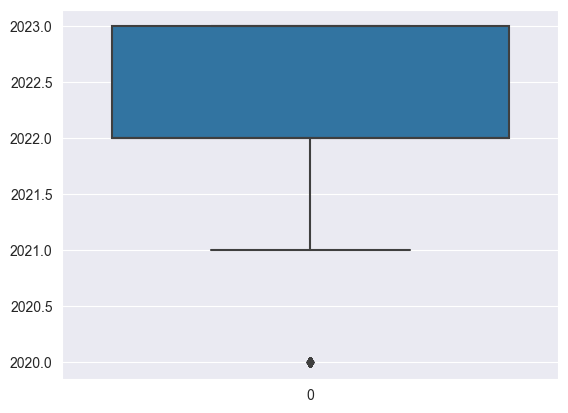



salary


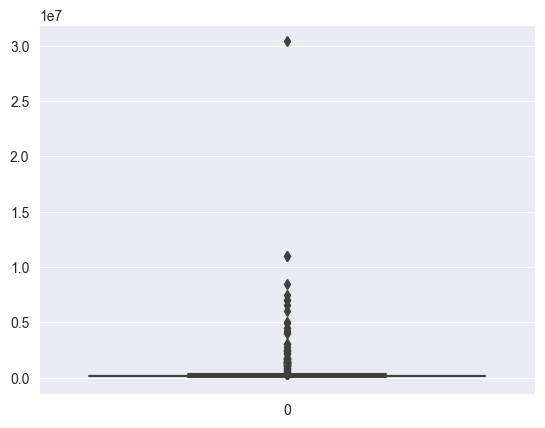



salary_in_usd


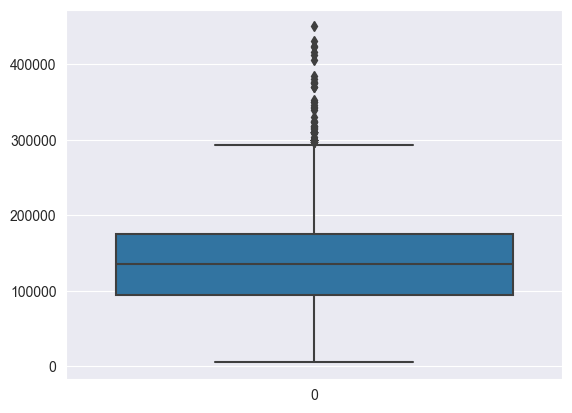



remote_ratio


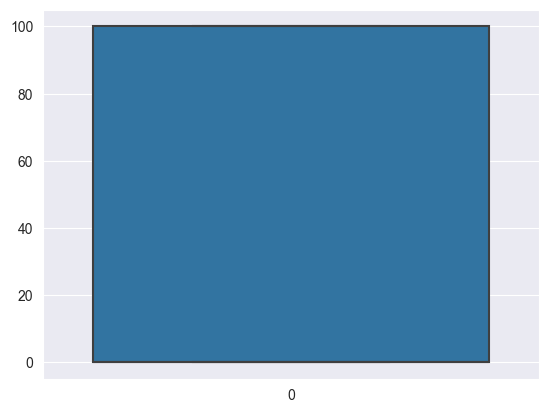

In [6]:
# check for number of outliers in each data column
def outliers(data):
    for i in data.columns:
        if data[i].dtype != 'object':
            print(i)
            sns.boxplot(data[i])
            plt.show()
            print('\n')
outliers(data)

In [7]:
def get_outliers(data):
    for i in data.columns:
        if data[i].dtype != 'object':
            print(i)
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - (1.5 * iqr)
            upper = q3 + (1.5 * iqr)
            print('Number of Outliers:', data[(data[i] < lower) | (data[i] > upper)][i].count())
            print('Outliers:\n', data[(data[i] < lower) | (data[i] > upper)][i])
            print('\n')

In [8]:
get_outliers(data)

work_year
Number of Outliers: 76
Outliers:
 183     2020
2118    2020
3119    2020
3120    2020
3138    2020
        ... 
3743    2020
3744    2020
3750    2020
3752    2020
3753    2020
Name: work_year, Length: 76, dtype: int64


salary
Number of Outliers: 113
Outliers:
 33       342810
41      1650000
68       309400
80       510000
133      342300
         ...   
3729    1335000
3734    1450000
3747     423000
3750     412000
3754    7000000
Name: salary, Length: 113, dtype: int64


salary_in_usd
Number of Outliers: 63
Outliers:
 33      342810
68      309400
83      300000
133     342300
145     318300
         ...  
3522    450000
3675    416000
3697    325000
3747    423000
3750    412000
Name: salary_in_usd, Length: 63, dtype: int64


remote_ratio
Number of Outliers: 0
Outliers:
 Series([], Name: remote_ratio, dtype: int64)




In [9]:
#remove outliers in the data
def remove_outliers(data):
    for i in data.columns:
        if data[i].dtype != 'object':
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - (1.5 * iqr)
            upper = q3 + (1.5 * iqr)
            data = data[(data[i] > lower) & (data[i] < upper)]
    return data
remove_outliers(data)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L


In [10]:
#remove duplicates in the data
data.drop_duplicates(inplace=True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


#### EDA

In [11]:
#explore the data
#check for the number of unique values in each column
def unique_values(data):
    for i in data.columns:
        print(i, data[i].nunique())
unique_values(data)

work_year 4
experience_level 4
employment_type 4
job_title 93
salary 815
salary_currency 20
salary_in_usd 1035
employee_residence 78
remote_ratio 3
company_location 72
company_size 3


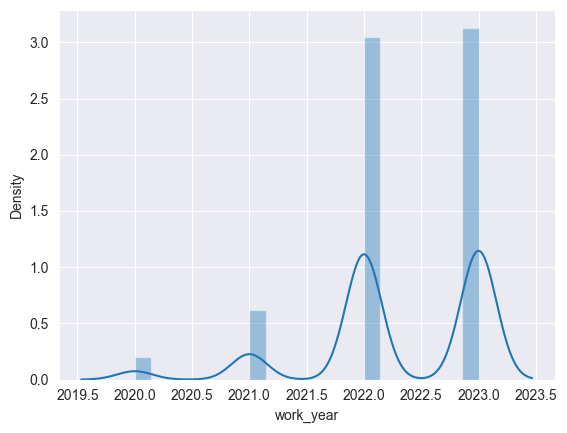

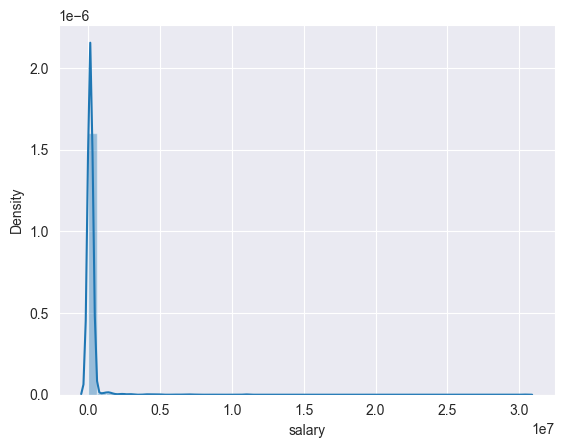

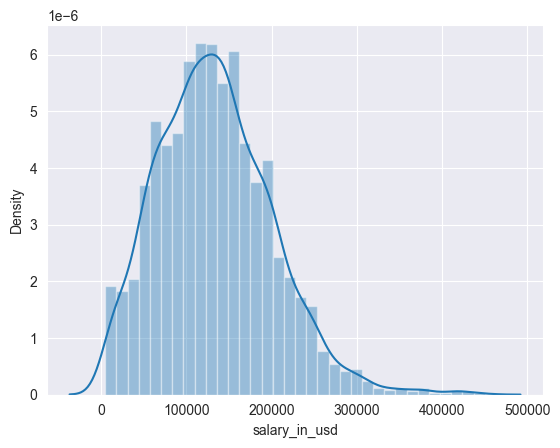

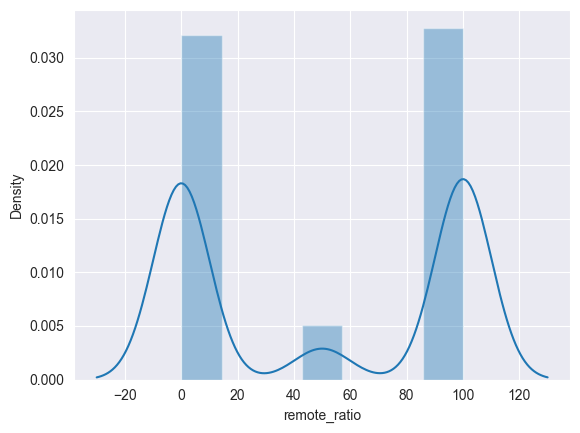

In [12]:
# visualize the data
#check for the distribution of the data
def distribution(data):
    for i in data.columns:
        if data[i].dtype != 'object':
            sns.distplot(data[i])
            plt.show()
distribution(data)

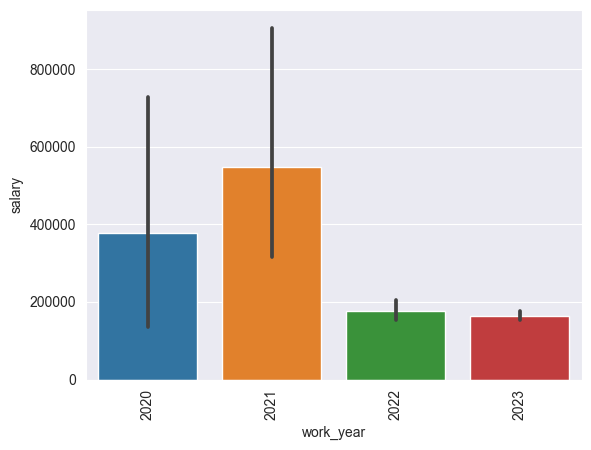

In [13]:
# plot work_year vs salary
sns.barplot(x='work_year', y='salary', data=data)
plt.xticks(rotation=90)
plt.show()

In [14]:
#group by work_year and salary
data.groupby('work_year')['salary'].mean()

work_year
2020    378170.786667
2021    547722.754386
2022    177876.830222
2023    164557.867647
Name: salary, dtype: float64

<Axes: xlabel='work_year'>

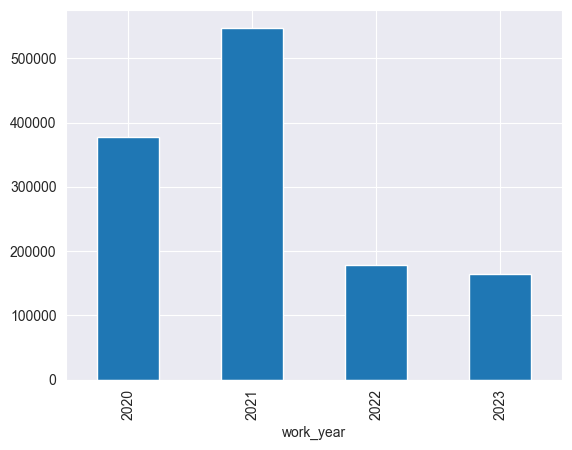

In [15]:
data.groupby('work_year')['salary'].mean().plot(kind='bar')

<Axes: xlabel='work_year'>

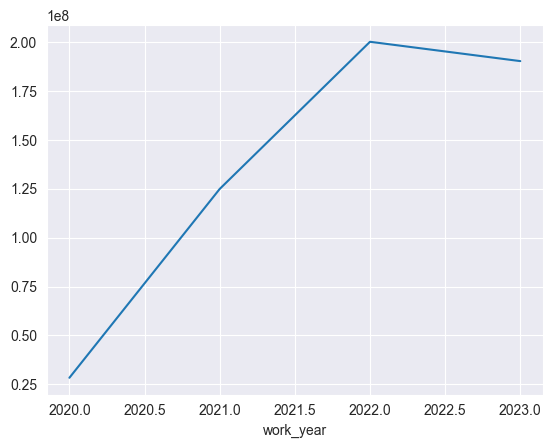

In [16]:
data.groupby('work_year')['salary'].sum().plot(kind='line')

In [18]:
data.groupby('work_year')['salary_in_usd'].sum()

work_year
2020      7001507
2021     21349324
2022    146448798
2023    169929951
Name: salary_in_usd, dtype: int64

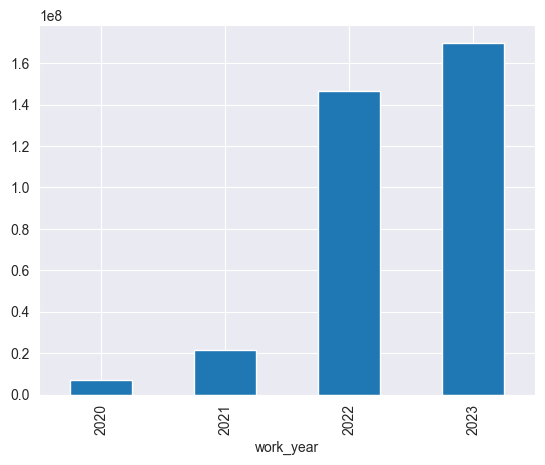

In [20]:
data.groupby('work_year')['salary_in_usd'].sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [21]:
data['work_year'].value_counts()

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64

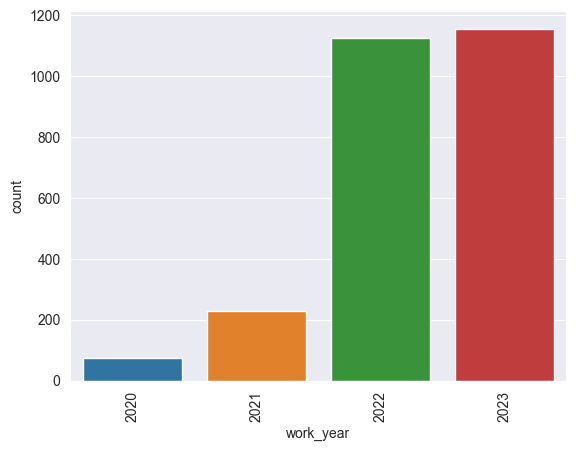

In [22]:
#plot work_year countplt
sns.countplot(x='work_year', data=data)
plt.xticks(rotation=90)
plt.show()

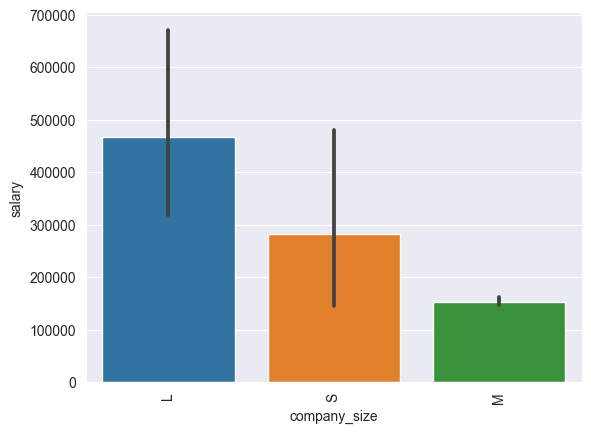

In [23]:
#check company size vs salary
sns.barplot(x='company_size', y='salary', data=data)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='company_size'>

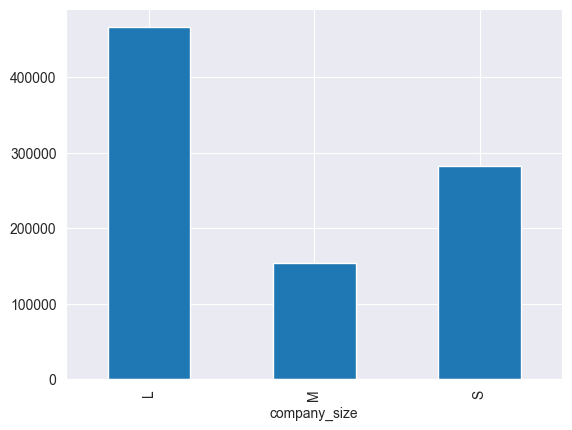

In [24]:
#group by company size and salary
data.groupby('company_size')['salary'].mean()
data.groupby('company_size')['salary'].mean().plot(kind='bar')

In [25]:
#check company size count
data['company_size'].value_counts()

company_size
M    2028
L     409
S     147
Name: count, dtype: int64

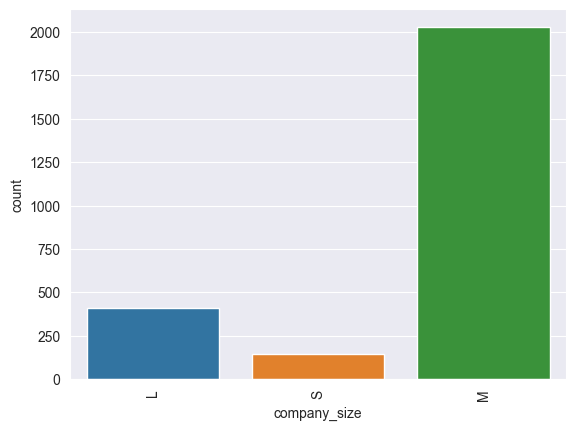

In [26]:
#plot company size count
sns.countplot(x='company_size', data=data)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='company_size'>

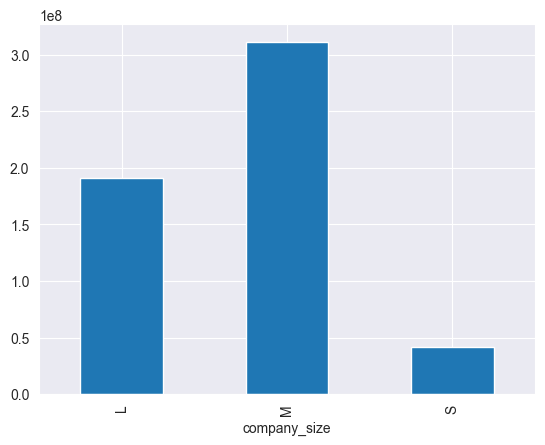

In [27]:
data.groupby('company_size')['salary'].sum().plot(kind='bar')

<Axes: xlabel='company_size'>

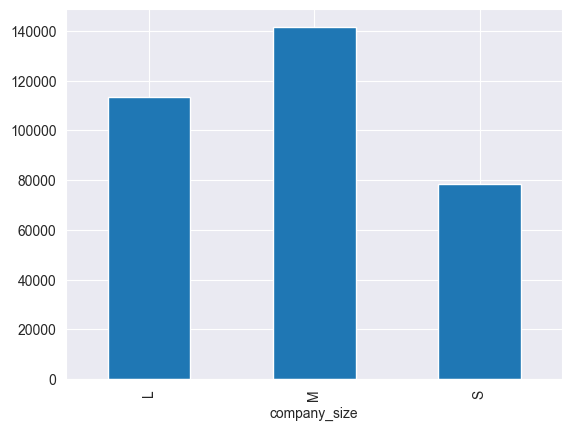

In [28]:
data.groupby('company_size')['salary_in_usd'].mean().plot(kind='bar')

<Axes: xlabel='company_size'>

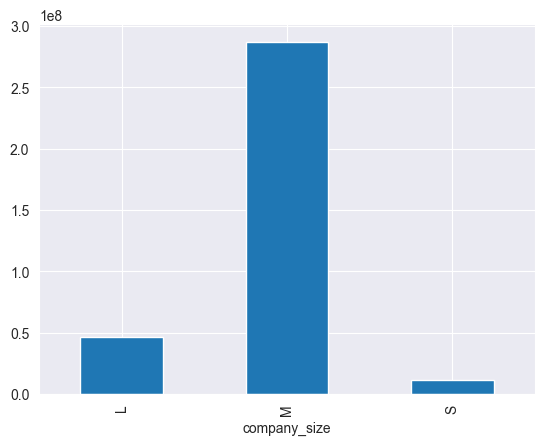

In [29]:
data.groupby('company_size')['salary_in_usd'].sum().plot(kind='bar')

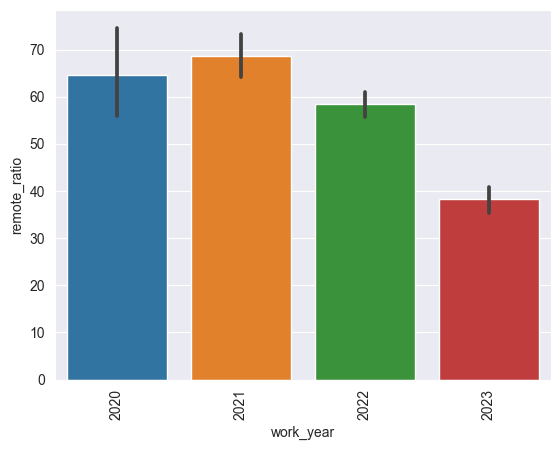

In [30]:
#plot work_year and remote ratio
sns.barplot(x='work_year', y='remote_ratio', data=data)
plt.xticks(rotation=90)
plt.show()

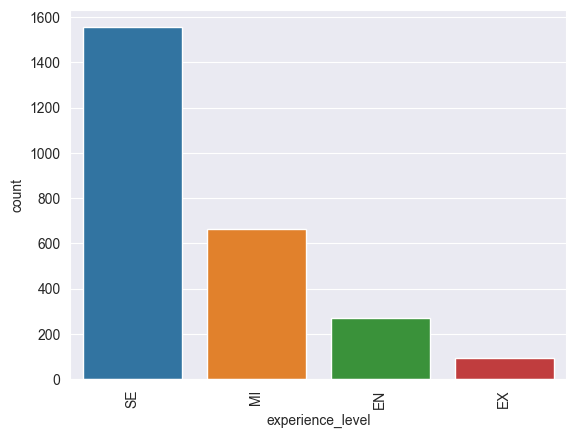

In [32]:
#plot experience value counts
sns.countplot(x='experience_level', data=data)
plt.xticks(rotation=90)
plt.show()

In [33]:
data['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

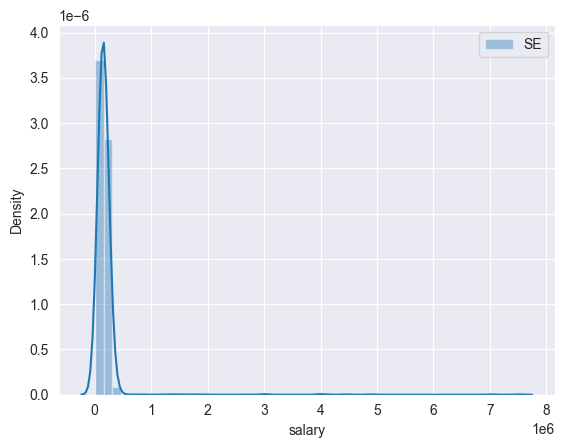

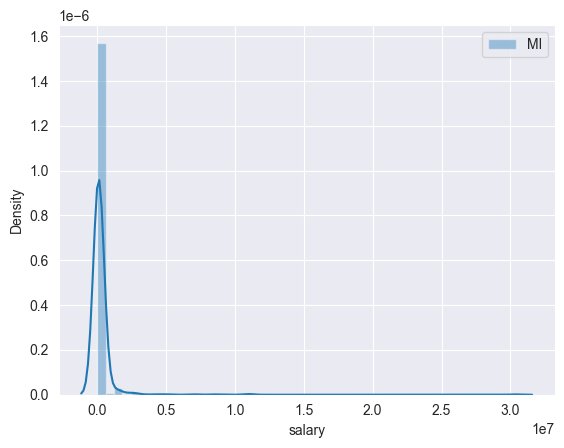

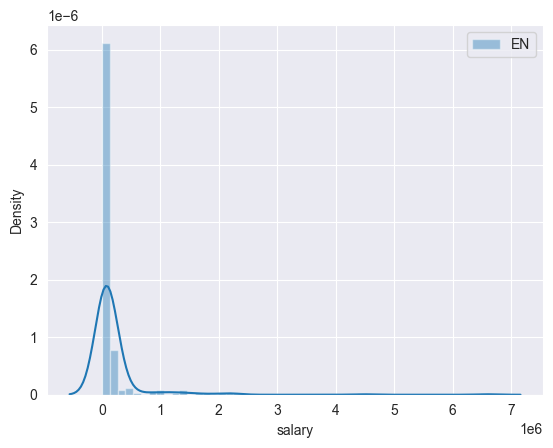

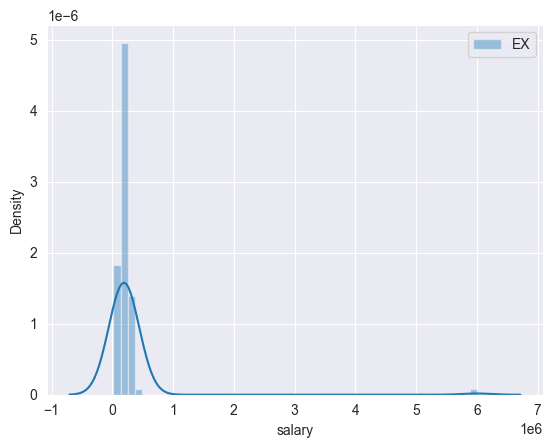

In [34]:
#for each feature in experince level, plot the salary
for i in data['experience_level'].unique():
    sns.distplot(data[data['experience_level'] == i]['salary'], label=i)
    plt.legend()
    plt.show()


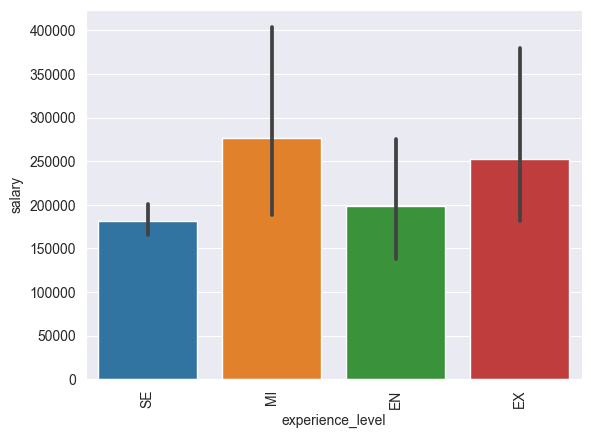

In [35]:
#plot salary vs experience level
sns.barplot(x='experience_level', y='salary', data=data)
plt.xticks(rotation=90)
plt.show()

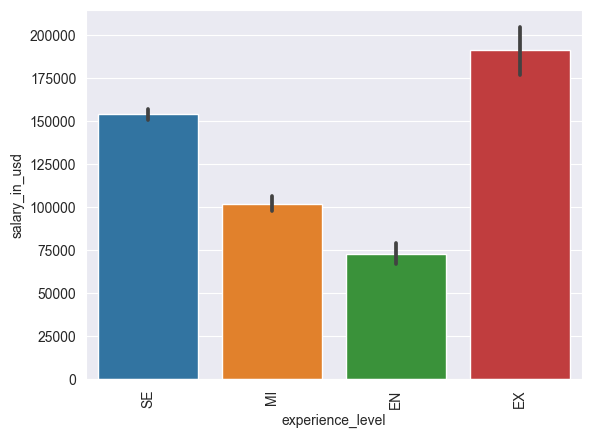

In [36]:
#plot salary_in_usd vs experience level
sns.barplot(x='experience_level', y='salary_in_usd', data=data)
plt.xticks(rotation=90)
plt.show()

In [37]:
data['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [38]:
data['employment_type'].value_counts()

employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

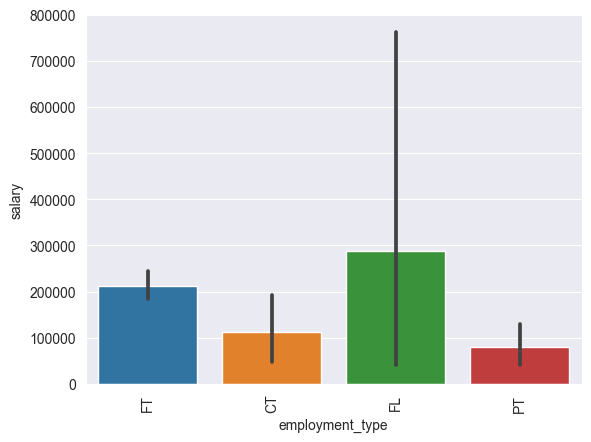

In [39]:
#plot employment type vs salary
sns.barplot(x='employment_type', y='salary', data=data)
plt.xticks(rotation=90)
plt.show()

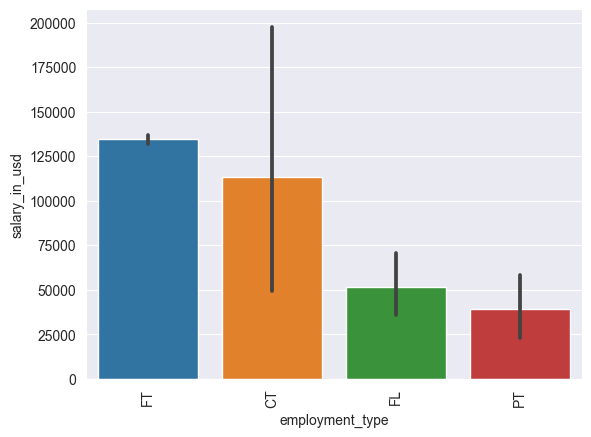

In [40]:
#explore employment type vs salary_in_usd
sns.barplot(x='employment_type', y='salary_in_usd', data=data)
plt.xticks(rotation=90)
plt.show()

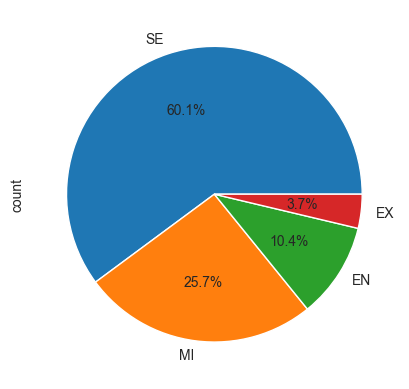

In [41]:
#plot pie chart for experience level
data['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()


#### Explanation
 - [x] SE = Senior/Exper Level
 - [x] MI = Middle/Intermediate Level
 - [x] EN = Entry /Junior Level
 - [x] EX = Executive Level

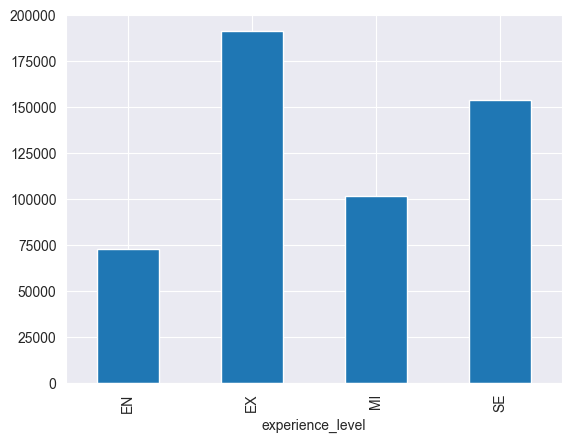

In [43]:
#explore which feature in experience level has the highest salary_in_usd
data.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

In [44]:
#explore job_title
data['job_title'].value_counts()

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: count, Length: 93, dtype: int64

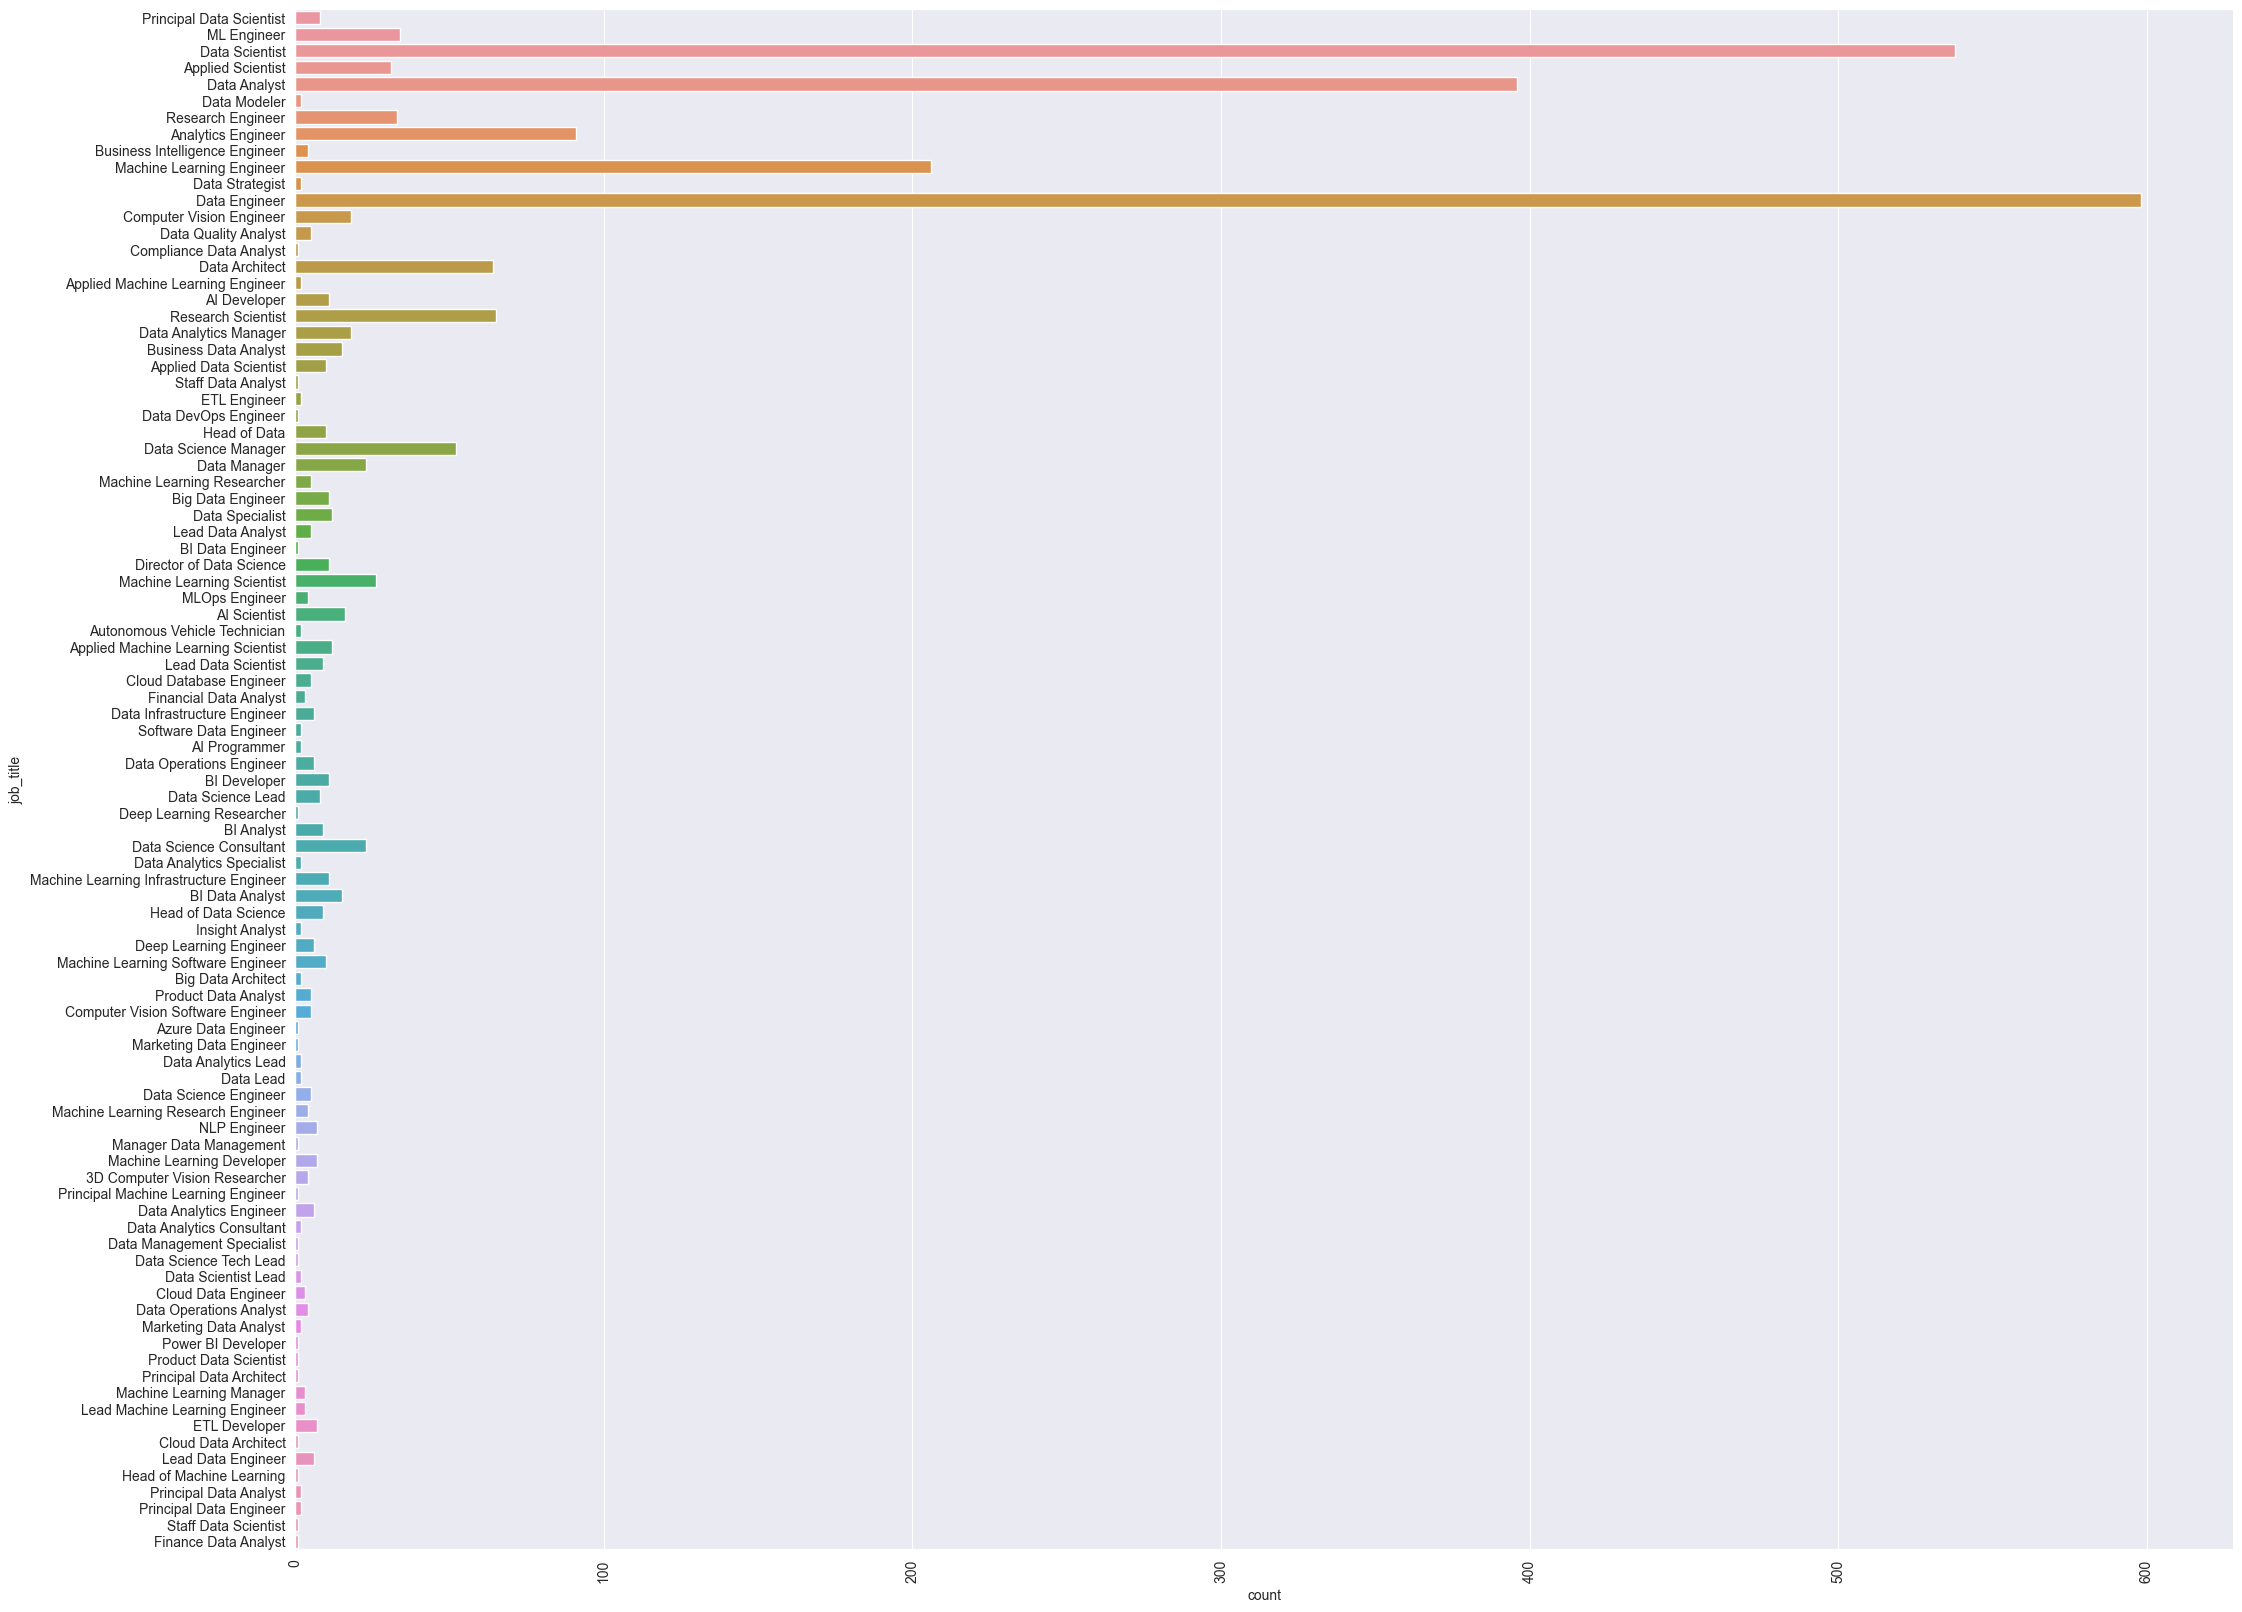

In [51]:
#plot job_title as a y-set make sure theres enough space
plt.figure(figsize=(25, 20))
sns.countplot(y='job_title', data=data)
plt.xticks(rotation=90)
plt.show()

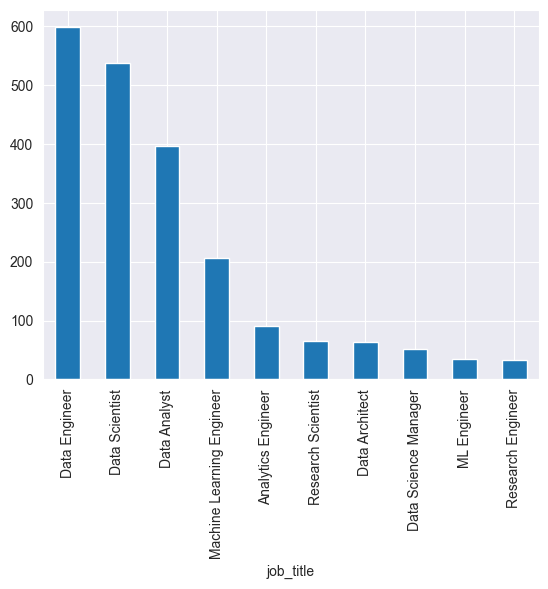

In [52]:
#from job_title extract the top 10 most frequest job titltes and plot count plot
data['job_title'].value_counts()[:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

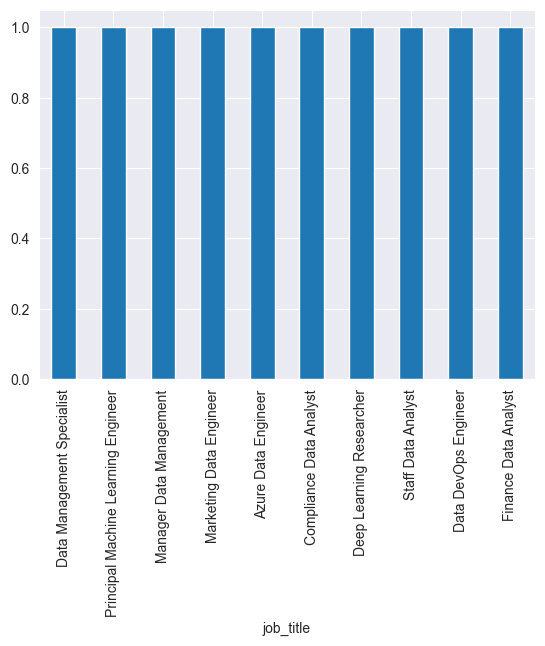

In [53]:
#plot the last top 10 job titles
data['job_title'].value_counts()[-10:].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

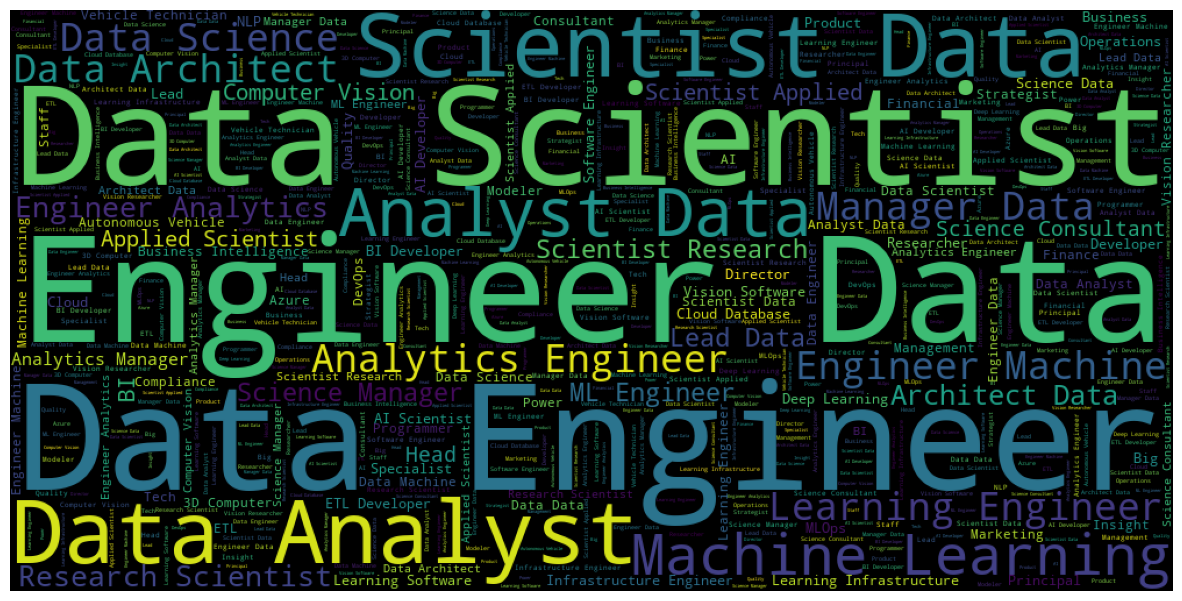

In [58]:
#plot wordcloud for all job_title
from wordcloud import WordCloud
text = ' '.join(data['job_title']) 
wordcloud = WordCloud(width=1000, height=500, repeat=True, max_words=1000).generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

